<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks classification with PyTorch

Classification is a problem of predicting whether someting is one thing or another (there can be multiple things as the options)

link to sorce repo: https://github.com/mrdbourke/pytorch-deep-learning

# 1. Make classification data and get it ready

In [232]:
import sklearn

In [233]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,  # add some noise to improve the versatility
                    random_state=42) # set a random seed

In [234]:
print(f"First 5 sample of X: \n {X[:5]}")
print(f"First 5 sample of y: \n {y[:5]}")

First 5 sample of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y: 
 [1 1 1 1 0]


In [235]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0],
                        "X1": X[:, 1],
                        "label": y})

circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


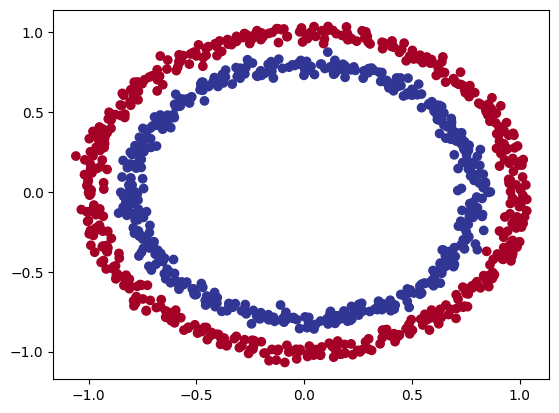

In [236]:
# Plot it
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

plt.show()

**NOTE:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to eperiment but still sizeable enough to practice the fundamentals.

## 1.1 Check the input and output shapes

In [237]:
X.shape, y.shape # X is representing the features of a thing... and y represent the label agents that feature set.

((1000, 2), (1000,))

In [238]:
from os import XATTR_SIZE_MAX
# View the first exemple of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Sample of X: {X_sample}, shape:{X_sample.shape}")
print(f"Sample of y: {y_sample}, shape:{y_sample.shape}")

Sample of X: [0.75424625 0.23148074], shape:(2,)
Sample of y: 1, shape:()


# Turn data into tensors and create a train and test splits

In [239]:
# Turn data into tensors

import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"X dtype: {X.dtype}")
print(f"y dtype: {y.dtype}")

X dtype: torch.float32
y dtype: torch.float32


In [240]:
# Make a random split with sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [241]:
len(X_train), len(X_test)

(800, 200)

# Build a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [242]:
# Import PyTorc and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Lets build a model.

1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layer that are capable of handeling the shapes ot the data
3. Define a `forward()` that outlines the forward pass (or forward computation) or the model
4. Make an istance and send it to the target `device`

In [243]:
# Build a class
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create the 2 linear layer
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # input features is 2. Becouse the shape of the traing data is 2, output features is made up number
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # input is the same as the output of previous layer, the output is one as this is binary classification and value is either 0 or 1

    # Create the forward method
    def forward(self, x):
      return self.layer_2(self.layer_1(x))  # nested structure... layer 2 take layer 1 that take the data.

# Make an instance
model_0 = CircleModelV0().to(device)  # + send it to device
model_0.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=5,1&seed=0.03172&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [244]:
# Let's replicate the model above using nn.Sequential()

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [245]:
# Make predictions

with torch.inference_mode():
  untrained_preds = model_1(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}")
print(f"Shape of predictions: {untrained_preds.shape}")
print(f"Predictions: {untrained_preds[:10]}")
print(f"Labels: {y_test[:10]}")

Length of predictions: 200
Shape of predictions: torch.Size([200, 1])
Predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
Labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


# Setup loss function and optimizer

Which loss function or optimizer should we use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary class entropy or categorical cross entropy (cross entropy)

As a reminder, the loss function measures how wrong your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has build-in options.

In [246]:
# Setup the loss function
# OR nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss() # This hase the sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [247]:
# Calculate accuracy - out of 100 exemples, what percentage does the model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# Train model

To train the model, we need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradinet descent)

# Going from raw logits -> prediction probabilities -> prediction labels

The raw output of the model is **logits**!

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g **sigmoid** for binary classification and **softmax** for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [248]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [249]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [250]:
# Use the sigmoid activition function to transfer the logits to labels (sigmoid function is for binary classification)
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

In [251]:
# Round it (and with that we cast it to 0 or 1 based on how fare of we are from 0.5)
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1`
* `y_pred_probs` < 0.5, `y=0`

In [252]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
print(f"y_preds == y_pred_labels: {y_preds == y_pred_labels}")
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')
y_preds == y_pred_labels: tensor([[True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [253]:
print(X_train.shape)
print(y_test.shape)

torch.Size([800, 2])
torch.Size([200])


# Building a training and test loop

In [254]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):

  model_0.train()

  y_logits = model_0(X_train.to(device))

  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train.to(device).unsqueeze(1))

  acc = accuracy_fn(y_true=y_train.to(device), y_pred=y_pred.to(device).squeeze())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test.to(device))
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test.to(device).unsqueeze(1))
    acc_t = accuracy_fn(y_true=y_test.to(device), y_pred=test_pred.to(device).squeeze())
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, loss: {loss}, testloss: {test_loss}, acc: {acc:.2f}%, test_acc: {acc_t:.2f}%")

Epoch: 0, loss: 0.6956853866577148, testloss: 0.6972115635871887, acc: 50.00%, test_acc: 50.00%
Epoch: 10, loss: 0.6940256357192993, testloss: 0.696153998374939, acc: 50.00%, test_acc: 50.00%
Epoch: 20, loss: 0.6934275031089783, testloss: 0.6958542466163635, acc: 46.00%, test_acc: 48.50%
Epoch: 30, loss: 0.6932066082954407, testloss: 0.6957688927650452, acc: 49.00%, test_acc: 47.50%
Epoch: 40, loss: 0.6931198239326477, testloss: 0.6957287192344666, acc: 49.50%, test_acc: 46.50%
Epoch: 50, loss: 0.693081259727478, testloss: 0.695688784122467, acc: 50.38%, test_acc: 46.50%
Epoch: 60, loss: 0.6930606961250305, testloss: 0.6956409215927124, acc: 50.50%, test_acc: 46.50%
Epoch: 70, loss: 0.6930473446846008, testloss: 0.6955872774124146, acc: 50.50%, test_acc: 46.50%
Epoch: 80, loss: 0.6930373311042786, testloss: 0.6955310702323914, acc: 50.75%, test_acc: 46.50%
Epoch: 90, loss: 0.6930291652679443, testloss: 0.6954748630523682, acc: 50.38%, test_acc: 46.50%


# Make predictions and evaluate the model

From the metrics it look like the model is not really lerning anything...

So, to inspect it let's make some predictions and make some visuals

In [255]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [256]:
# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

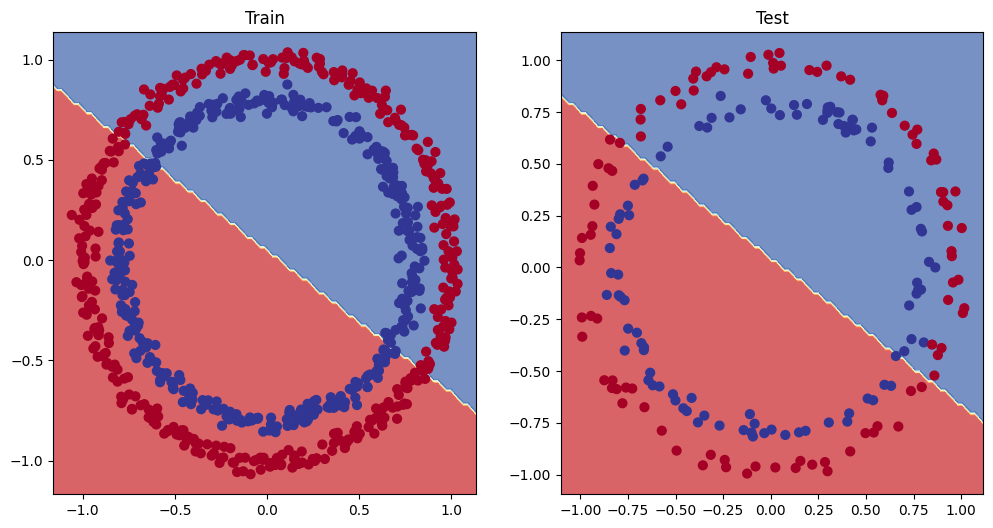

In [257]:
# Plot the decision boundary for the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_0, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")

plot_decision_boundary(model=model_0, X=X_test, y=y_test)

The model is crap, as it try to use linear activation to build bounderys...

When the data has this shape we. Need a ReLU or Tanh activition function.

Like: https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=5,1&seed=0.03172&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Lets improve the model. By changing some of the **hyperparameters**

* Add more layers - give the model more chance to learn about patterns in the data
* Add more hidden units - go from 5 unit to 10 hidden units
* Fir for longer. Give the model more time to learn - incrase epochs
* Change the activation functions
* Change the learning rate
* Change the loss function

These options are all from the model's perspective because they deal directly with the model, rather than the data.

Let's try to improve the model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [258]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [259]:
loss_fn_V1 = nn.BCEWithLogitsLoss() # This hase the sigmoid activation function built-in

optimizer_V1 = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [260]:
# cast seed + make training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

  model_1.train()

  y_logits = model_1(X_train.to(device))

  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn_V1(y_logits, y_train.to(device).unsqueeze(1))

  acc = accuracy_fn(y_true=y_train.to(device), y_pred=y_pred.to(device).squeeze())

  optimizer_V1.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test.to(device))
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn_V1(test_logits, y_test.to(device).unsqueeze(1))
    acc_t = accuracy_fn(y_true=y_test.to(device), y_pred=test_pred.to(device).squeeze())

    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, loss: {loss}, testloss: {test_loss}, acc: {acc:.2f}%, test_acc: {acc_t:.2f}%")




Epoch: 0, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 100, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 200, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 300, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 400, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 500, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 600, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 700, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 800, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%
Epoch: 900, loss: 0.6939550638198853, testloss: 0.6926102042198181, acc: 50.88%, test_acc: 51.00%


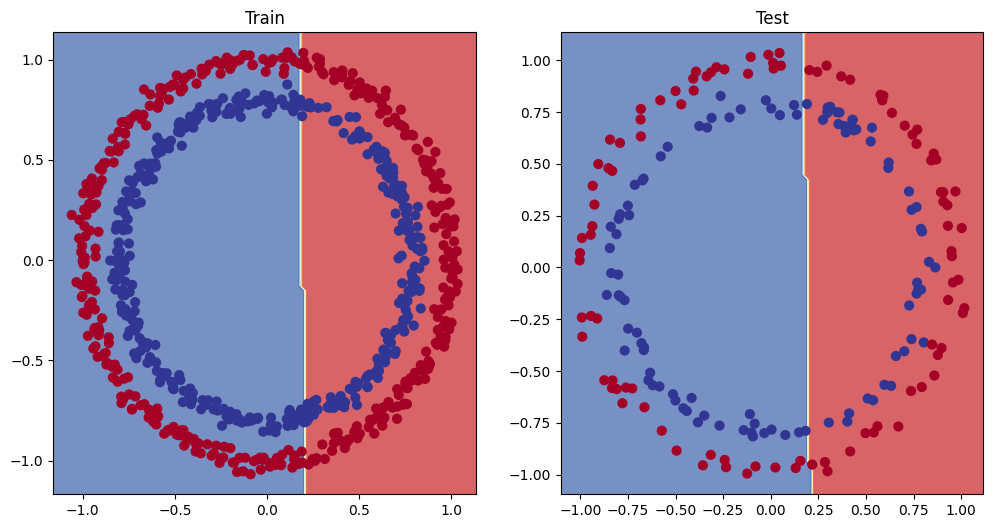

In [261]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")

plot_decision_boundary(model=model_1, X=X_test, y=y_test)